<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#出现Invalid-Spark-URL错误" data-toc-modified-id="出现Invalid-Spark-URL错误-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>出现<code>Invalid Spark URL</code>错误</a></span></li><li><span><a href="#reduce过程出现TypeError:-'int'-object-is-not-subscriptable错误" data-toc-modified-id="reduce过程出现TypeError:-'int'-object-is-not-subscriptable错误-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>reduce过程出现<code>TypeError: 'int' object is not subscriptable</code>错误</a></span></li></ul></div>

## 出现`Invalid Spark URL`错误

Screen Shot 2019-09-13 at 19.38.08.png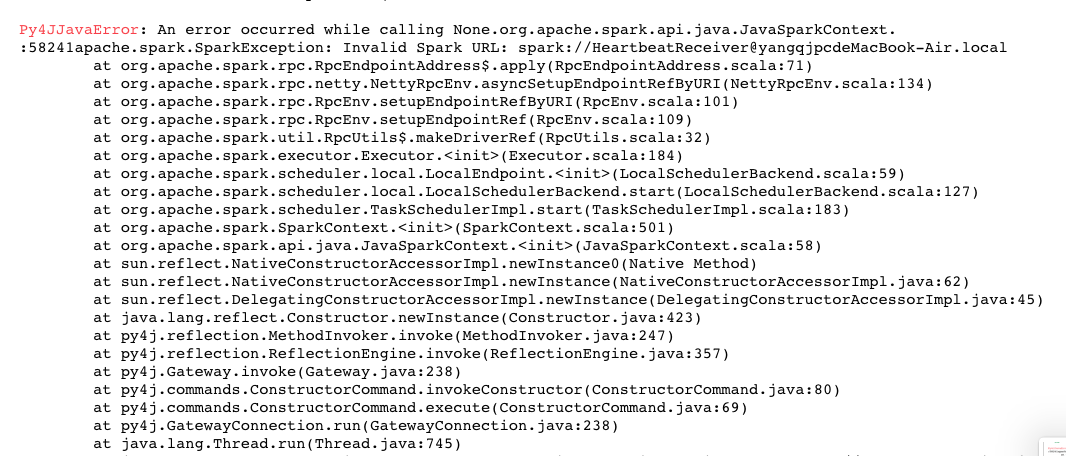

出现该错误是因为spark本地运行模式无法识别本地ip，需要设置`SparkSesison`或者`SparkContext`的`spark.driver.host`属性为`localhost`

```python
conf = SparkConf().setAppName("miniProject").setMaster("local[*]").set('spark.driver.host', 'localhost')
```

## reduce过程出现`TypeError: 'int' object is not subscriptable`错误

假设数据如下所示：

In [85]:
terms.take(3)

[['196', '242', 3, 881250949],
 ['186', '302', 3, 891717742],
 ['22', '377', 1, 878887116]]

当需要统计第3列数的平均值时，使用下面的代码实现这个功能：

```python
terms.reduce(lambda x, y: x[2] + y[2]) / terms.count()
```

会出现`TypeError: 'int' object is not subscriptable`错误

**我的解决方法**是先用map取出第三列的数据，然后再reduce统计总和

```python
terms.map(lambda x: x[2]).reduce(lambda x, y: x + y) / terms.count()
```

**问题原因**

其实问题的原因在于reduce函数使用错误。第一次相加的时候，传入的x和y分别是 `['196', '242', 3, 881250949], ['186', '302', 3, 891717742]`，相加后得到的结果是`6`，是一个整数。第二次相加的时候，传入的x其实是6，而不是第三个元素`['22', '377', 1, 878887116]`。当执行`x[2]`的时候，是对一个int整数取下标，所以出现了错误。



**解决办法**

解决的办法有两种
+ 第一种是先用map取出第三个元素，这样得到了一个全为整数的list，接着使用reduce相加
```python
terms.map(lambda x: x[2]).reduce(lambda x, y: x+y) / terms.count()
```

+ 第二种是直接使用reduce，不过函数返回的结果需要手动补上第1和第2个元素，这样第二次相加的时候就可以对一个list取下标

```python
terms.reduce(lambda x, y: (0, 0, x + y, 0)) / terms.count()
```